In [8]:
!dir

 El volumen de la unidad C es Windows-SSD
 El n�mero de serie del volumen es: FC6F-F880

 Directorio de c:\Users\veron\Downloads\mammography_spectra

05/08/2025  06:13 p.�m.    <DIR>          .
05/08/2025  06:13 p.�m.    <DIR>          ..
05/08/2025  06:01 p.�m.    <DIR>          Mo_unfiltered_10kV-50kV
05/08/2025  06:01 p.�m.             1.225 README_OAR_mammography_spectra.txt
05/08/2025  06:01 p.�m.    <DIR>          Rh_unfiltered_10kV-50kV
05/08/2025  06:20 p.�m.            14.202 Taller 1 MC2.ipynb
05/08/2025  06:01 p.�m.    <DIR>          W_unfiltered_10kV-50kV
               2 archivos         15.427 bytes
               5 dirs  377.086.455.808 bytes libres


In [6]:
import numpy as np
import pandas as pd
from glob import glob

In [10]:
glob("*/*.dat")

['Mo_unfiltered_10kV-50kV\\Mo_10kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_11kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_12kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_13kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_14kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_15kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_16kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_17kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_18kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_19kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_20kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_21kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_22kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_23kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_24kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_25kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_26kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_27kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_28kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_29kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_30kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_31kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_32kV.dat',
 'Mo_unfiltered_10kV-50kV\\Mo_33kV.dat',
 'Mo_unfiltered_

Gráfico guardado como 1.pdf


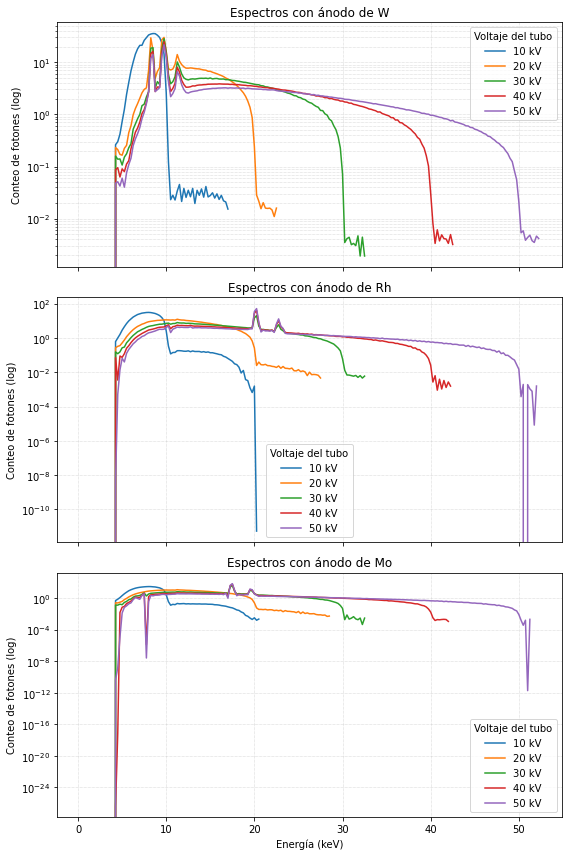

In [4]:
#scipy y signal
import os
import matplotlib.pyplot as plt

# Función para cargar espectros desde archivos .dat
def load_spectrum(path):
    energy = []  # Lista para guardar energías
    counts = []  # Lista para guardar conteos

    with open(path, 'r', encoding='latin1') as file:
        for line in file:
            line = line.strip()
            if line == '' or line.startswith('#'):
                continue
            parts = line.split()
            if len(parts) >= 2:
                try:
                    e = float(parts[0])     # energía
                    c = float(parts[1])     # conteo
                    energy.append(e)        # guardamos energía
                    counts.append(c)        # guardamos conteo
                except:
                    continue

    if not energy:
        return None, None

    return energy, counts



# Lista explícita de los 15 archivos
files_by_element = {
    "W": [
        "W_unfiltered_10kV-50kV/W_10kV.dat",
        "W_unfiltered_10kV-50kV/W_20kV.dat",
        "W_unfiltered_10kV-50kV/W_30kV.dat",
        "W_unfiltered_10kV-50kV/W_40kV.dat",
        "W_unfiltered_10kV-50kV/W_50kV.dat"
    ],
    "Rh": [
        "Rh_unfiltered_10kV-50kV/Rh_10kV.dat",
        "Rh_unfiltered_10kV-50kV/Rh_20kV.dat",
        "Rh_unfiltered_10kV-50kV/Rh_30kV.dat",
        "Rh_unfiltered_10kV-50kV/Rh_40kV.dat",
        "Rh_unfiltered_10kV-50kV/Rh_50kV.dat"
    ],
    "Mo": [
        "Mo_unfiltered_10kV-50kV/Mo_10kV.dat",
        "Mo_unfiltered_10kV-50kV/Mo_20kV.dat",
        "Mo_unfiltered_10kV-50kV/Mo_30kV.dat",
        "Mo_unfiltered_10kV-50kV/Mo_40kV.dat",
        "Mo_unfiltered_10kV-50kV/Mo_50kV.dat"
    ]
}

# Crear gráfico
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

for ax, (element, file_list) in zip(axes, files_by_element.items()):
    for file in file_list:
        if not os.path.exists(file):
            print(f"Archivo no encontrado: {file}")
            continue
        kv = file.split("_")[-1].replace("kV.dat", "") + " kV"
        energy, counts = load_spectrum(file)
        if energy is not None:
            ax.plot(energy, counts, label=kv)
    ax.set_yscale('log')
    ax.set_ylabel("Conteo de fotones (log)")
    ax.set_title(f"Espectros con ánodo de {element}")
    ax.legend(title="Voltaje del tubo")
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)

axes[-1].set_xlabel("Energía (keV)")
plt.tight_layout()
plt.savefig("1.pdf", bbox_inches="tight", pad_inches=0.1)
print("Gráfico guardado como 1.pdf")
